In [1]:
# use the PHM-env
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from driver_run_hind_LV123 import driver_run_hind_LV123



In [ ]:
fn_nud='/scratch/PFM_Simulations/LV4_Forecast/Forc/LV4_nud.nc'
nud = nc.Dataset(fn_nud)
print(nud.variables.keys())
print(nud.variables['tracer_NudgeCoef'][0,0])


In [ ]:

infile = '/home/mspydell/models/PFM_root/PFM/sdpm_py_util/phm_model_info_devel.py'
pkl_fnm = '/scratch/PHM_Simulations/hindcast_pfile.pkl'

# to run from the command line do:
# python driver_run_hind_LV123.py '/home/mspydell/models/PFM_root/PFM/sdpm_py_util/phm_model_info_devel.py' '/scratch/PHM_Simulations/hindcast_pfile.pkl' > hindcast.out

In [ ]:

driver_run_hind_LV123(infile,pkl_fnm)


first, we need all the model information.
from /home/mspydell/models/PFM_root/PFM/sdpm_py_util/phm_model_info_devel.py
we create a dictionary of model info
the model_info dictionary is saved to /scratch/PHM_Simulations/hindcast_pfile.pkl
this file dictates how the model is run, where files are saved, etc.
------------------------------------------------------------
                        Model Set Up                        
------------------------------------------------------------
hindcast                                                    
from           : 2024-10-11 00:00                           
to             : 2024-10-13 00:00                           
in             : 1.0 day chunks (if hindcast)               
we will do     : 2 separate 1.0 day sims                    
atm model      : nam_analysis                               
ocean_model    : hycom_hind_wtide                           
running levels : LV1, LV2, LV3                              
PFM info was edited an

In [3]:
import sys
sys.path.append('../sdpm_py_util')
import ocn_functions as ocnfuns
import plotting_functions as plotfuns


In [ ]:

t1str = '2024101100' 
t2str = '2024101300'
ocnfuns.get_hind_nc_cmd_list(t1str,t2str,pkl_fnm)


In [5]:
print(np.arange(11,19))

[11 12 13 14 15 16 17 18]


(25, 413, 251)
(25, 413, 251)


Text(0, 0.5, 'ssh [m]')

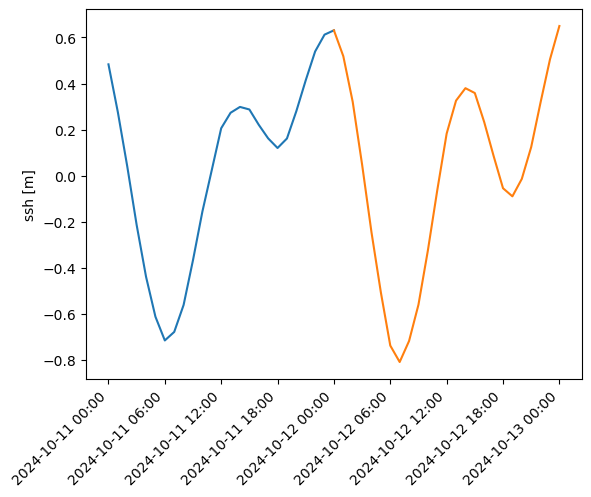

In [ ]:
fig, ax = plt.subplots()

for ii in np.arange(11,13):
    fn1 = '/scratch/PHM_Simulations/LV3_Forecast/His/LV3_ocean_his_202410' + str(ii) + '0000.nc'

    hs1 = nc.Dataset(fn1)

    t1 = hs1.variables['ocean_time']

    t1v = t1[:]
    time_units = t1.units

    if 'since' in time_units:
        calendar = t1.calendar if hasattr(t1, 'calendar') else 'standard'
        t1dt = nc.num2date(t1, units=time_units, calendar=calendar)
    else:
        raise ValueError("Time units not recognized. Please ensure units are in '... since ...' format")

    t1dtnp = np.array(t1dt, dtype='datetime64[ns]')

    print(np.shape(hs1.variables['zeta'][:]))
    eta1 = hs1.variables['zeta'][:,10,10]

    ax.plot(t1dtnp,eta1)
    
date_format = mdates.DateFormatter("%Y-%m-%d %H:%M")  # e.g., 2025-03-05
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45, ha='right') 
ax.set_ylabel("ssh [m]")


In [ ]:

for ii in np.arange(11,13):
    fn1 = '/scratch/PHM_Simulations/LV3_Forecast/His/LV3_ocean_his_202410' + str(ii) + '0000.nc'

    hs1 = nc.Dataset(fn1)

    t1 = hs1.variables['ocean_time']

    t1v = t1[:]
    time_units = t1.units

    if 'since' in time_units:
        calendar = t1.calendar if hasattr(t1, 'calendar') else 'standard'
        t1dt = nc.num2date(t1, units=time_units, calendar=calendar)
    else:
        raise ValueError("Time units not recognized. Please ensure units are in '... since ...' format")

    t1dtnp = np.array(t1dt, dtype='datetime64[ns]')

    print(np.shape(hs1.variables['zeta'][:]))
    eta1 = hs1.variables['zeta'][:,10,10]

    ax.plot(t1dtnp,eta1)
    
date_format = mdates.DateFormatter("%Y-%m-%d %H:%M")  # e.g., 2025-03-05
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45, ha='right') 
ax.set_ylabel("ssh [m]")


getting clims...
...done.


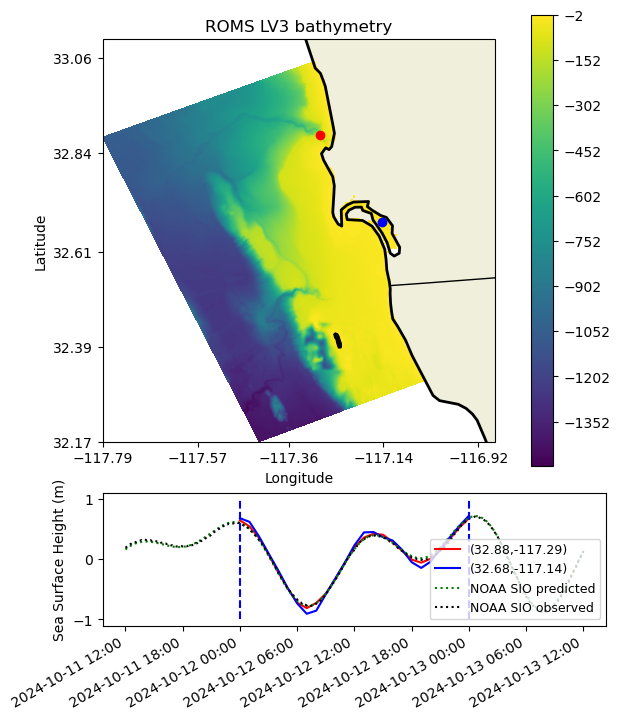

In [6]:
plotfuns.make_all_his_figures('LV3',pkl_fnm)
